In [1]:
import numpy as np
import tensorflow as tf

## Tensor Type

In [2]:
a1 = [[0.0, 0.5], [1.0, 0.0]]
a2 = np.array([[0.0, 0.5], [1.0, 0.0]], dtype=np.float32)
a3 = tf.constant([[0.0, 0.5], [1.0, 0.0]])
print(type(a1))
print(type(a2))
print(type(a3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [3]:
a = tf.constant(3.0)
b = tf.constant(2.0)
c = tf.constant(1.0)
d = tf.constant(5.0)

a_minus_b = tf.subtract(a, b)
c_times_d = tf.multiply(c, d)
y = tf.add(a_minus_b, c_times_d)
print(y)

tf.Tensor(6.0, shape=(), dtype=float32)


Some comments on no-more sessions, no-more tf.get_variable, no-more placeholders and no-more computational graphs.

## Linear Regression

This dataset is comprised of 63 observations:
$x$: Number of claims. 
$y$: Total payment for all claims in thousands of Swedish Kronor.

In [4]:
# Data 
import pandas as pd
df = pd.read_csv('./data/auto_insurance_in_sweden.csv', header=0)
x = df.iloc[:, 0].values # Independent variable
y = df.iloc[:, 1].values # Dependent variable

In [5]:
x = tf.cast(x, tf.float32)
y = tf.cast(y, tf.float32)

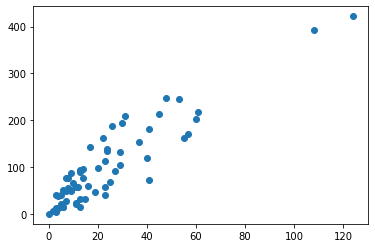

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

### Build the model

In [7]:
W = tf.Variable(tf.ones(shape=(1)), name="W")
b = tf.Variable(tf.zeros(shape=(1)), name="b")

@tf.function
def lr_model(x):
    return W * x + b

### Select an optimizer

In [8]:
optimiser = tf.optimizers.SGD(learning_rate=1e-4)

### Train the model

In [9]:
epochs = 50
loss_list = []
for iter in range(epochs):
    with tf.GradientTape() as tape: 
        # MSE loss
        y_predicted = lr_model(x)
        loss = tf.reduce_mean(tf.square(y - y_predicted))
     
    grads = tape.gradient(loss, [W, b]) 
    optimiser.apply_gradients(zip(grads, [W, b]))
    loss_list.append(loss)                            

Some comments on no more session execution for training, optimizers not available in the train package, and Keras becomes the default high-level API.

### Plot the loss

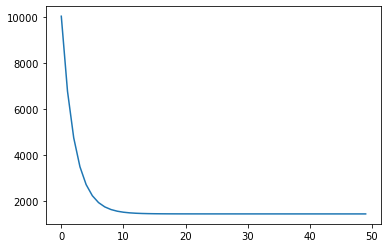

In [10]:
plt.plot(loss_list)

### Plot the result

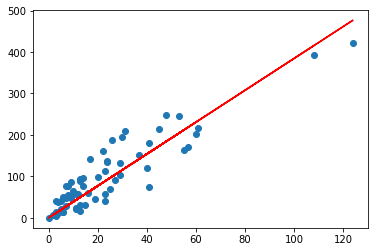

In [11]:
plt.scatter(x, y)
y_trained = W * x + b
plt.plot(x, y_trained, 'r')
plt.show()